In [1]:
#准备工作环境，设置路径

In [2]:
getwd()

[1] "/Users/zhoudan"

In [3]:
setwd('/Users/zhoudan/Neural Network')

In [4]:
A_index<-data.frame(read.csv("A_index.csv",header=T))

In [5]:
head(A_index)

,X,date,open,high,close,low,volume,index
1,1,2012-01-04,2317.265,2323.082,2272.671,2271.889,4906726000,623
2,2,2012-01-05,2263.752,2287.461,2250.846,2247.811,5852715200,622
3,3,2012-01-06,2250.559,2267.511,2266.527,2234.297,5037613200,621
4,4,2012-01-09,2267.92,2332.246,2331.893,2250.819,7640185600,620
5,5,2012-01-10,2327.617,2397.669,2394.602,2323.874,10914484800,619
6,6,2012-01-11,2391.622,2399.767,2384.441,2373.102,8411556800,618


In [6]:
A_index$X<-NULL

In [7]:
A_index$index<-NULL

In [8]:
head(A_index)

,date,open,high,close,low,volume
1,2012-01-04,2317.265,2323.082,2272.671,2271.889,4906726000
2,2012-01-05,2263.752,2287.461,2250.846,2247.811,5852715200
3,2012-01-06,2250.559,2267.511,2266.527,2234.297,5037613200
4,2012-01-09,2267.92,2332.246,2331.893,2250.819,7640185600
5,2012-01-10,2327.617,2397.669,2394.602,2323.874,10914484800
6,2012-01-11,2391.622,2399.767,2384.441,2373.102,8411556800


In [9]:
dates<-as.Date(A_index[,1])

In [10]:
A_index$date<-NULL

In [11]:
head(A_index)

,open,high,close,low,volume
1,2317.265,2323.082,2272.671,2271.889,4906726000
2,2263.752,2287.461,2250.846,2247.811,5852715200
3,2250.559,2267.511,2266.527,2234.297,5037613200
4,2267.92,2332.246,2331.893,2250.819,7640185600
5,2327.617,2397.669,2394.602,2323.874,10914484800
6,2391.622,2399.767,2384.441,2373.102,8411556800


In [12]:
nrow(A_index)

[1] 623

In [13]:
#数据分成训练集和测试集两个部分，并且进行数据标准化

In [14]:
train<-A_index[c(0:500),]

In [15]:
test<-A_index[c(501:623),]

In [16]:
scaled<-as.data.frame(scale(A_index))

In [17]:
train_<-scaled[c(0:500),]

In [18]:
test_<-scaled[c(501:623),]

In [19]:
head(train_)

,open,high,close,low,volume
1,0.3384113,0.2620399,-0.006916311,0.1140257,-1.436619
2,-0.05891628,-0.001623227,-0.1693022,-0.06641021,-1.140394
3,-0.1568727,-0.1492912,-0.05262989,-0.1676815,-1.395633
4,-0.02796938,0.329871,0.4337168,-0.04386884,-0.580669
5,0.4152737,0.8141256,0.9002944,0.5035913,0.4446388
6,0.8905031,0.8296548,0.8246929,0.8724965,-0.3391233


In [20]:
head(test_)

,open,high,close,low,volume
501,-0.9986313,-1.041272,-0.9550341,-0.9143496,-0.6667944
502,-0.9697931,-1.085173,-1.08617,-0.979733,-1.0199
503,-1.153314,-1.094322,-0.9970349,-1.111287,-0.678129
504,-0.9379626,-0.7582605,-0.6724269,-0.8341583,0.9052118
505,-0.6559731,-0.5784609,-0.5343858,-0.5784696,1.465564
506,-0.5178555,-0.5794824,-0.485205,-0.4674863,0.9697979


In [21]:
#调入neuralnet包

In [22]:
library(neuralnet)

Loading required package: grid
Loading required package: MASS


In [23]:
n<-names(train_)

In [24]:
f <- as.formula(paste("close ~", paste(n[!n %in% "close"], collapse = " + ")))

In [25]:
nn<-neuralnet(f,data=train_,hidden=3,rep=10,linear.output=FALSE)

In [26]:
nn

Call: neuralnet(formula = f, data = train_, hidden = 3, rep = 10, linear.output = FALSE)

10 repetitions were calculated.

         Error Reached Threshold Steps
6  103.8621395    0.009798719338  1395
3  103.8669148    0.009529707445  1491
2  103.8767040    0.009052110366   614
4  103.8845496    0.008858636744  1073
1  103.8867198    0.009363340683   592
5  103.8932209    0.009000414092   360
8  103.8974423    0.009971031803   861
10 103.9061371    0.009862469403  1272
9  103.9138978    0.009959824298   938
7  103.9235842    0.009970904557   920


In [27]:
par(mfrow=c(2,1))

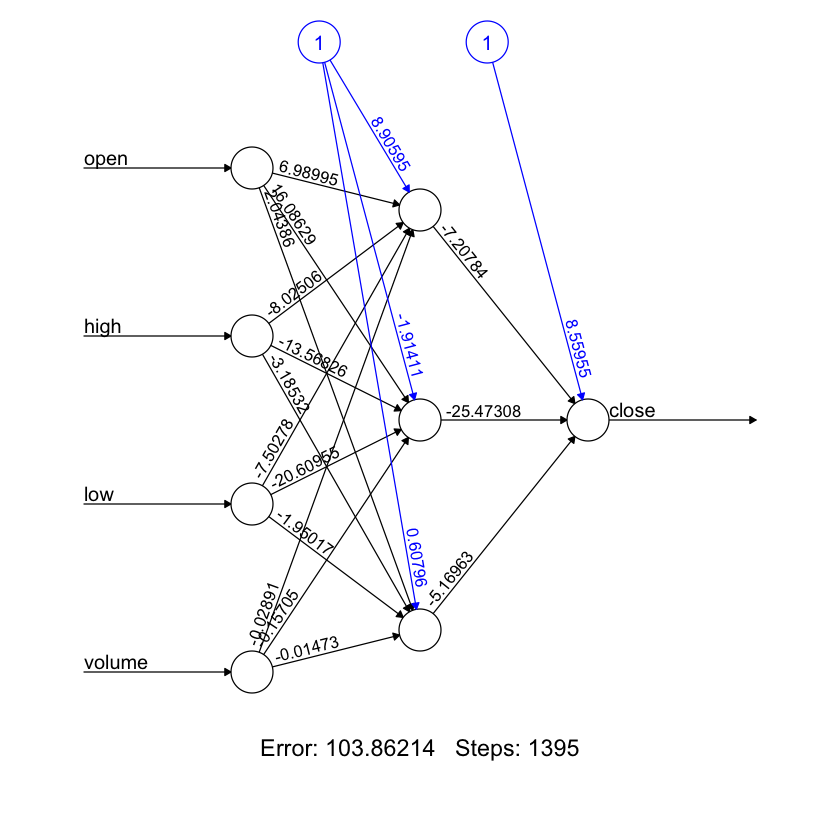

In [28]:
plot.nn(nn,rep='best')

In [29]:
ls(nn)

[1] "act.fct"             "call"                "covariate"          
 [4] "data"                "err.fct"             "generalized.weights"
 [7] "linear.output"       "model.list"          "net.result"         
[10] "response"            "result.matrix"       "startweights"       
[13] "weights"

In [30]:
nn$result.matrix

,1,2,3,4,5,6,7,8,9,10
error,103.8867198,103.8767040,103.8669148,103.8845496,103.8932209,103.8621395,103.9235842,103.8974423,103.9138978,103.9061371
reached.threshold,0.009363340683,0.009052110366,0.009529707445,0.008858636744,0.009000414092,0.009798719338,0.009970904557,0.009971031803,0.009959824298,0.009862469403
steps,592,614,1491,1073,360,1395,920,861,938,1272
Intercept.to.1layhid1,-1.69761850218,7.94609834663,-2.19339138500,-2.59707694293,-1.37816035823,8.90594847345,-0.05755141287,-1.78821307201,5.20985121563,5.82591012830
open.to.1layhid1,17.583131305,4.683449555,19.915932672,-1.722725610,3.682266482,6.989949903,-17.583733959,26.232853160,2.598657659,1.707973811
high.to.1layhid1,-16.227664507,-3.196241143,-17.832404925,2.303917301,-4.969902613,-8.025058918,16.541925201,-23.276634368,-4.652671127,-1.684725645
low.to.1layhid1,-21.4617588652,-8.8515119423,-24.8122217860,0.6968969244,-6.3360978289,-7.5027809269,21.6155925599,-30.3170968960,-2.7869557396,-4.6876690526
volume.to.1layhid1,-0.16951587697,-0.11682786444,-0.20179668062,-0.03051839343,-0.15793731568,-0.02890981941,0.19636753895,-0.06007886479,0.03110639258,-0.04696936063
Intercept.to.1layhid2,-2.036362459,-1.685911839,11.097968396,-1.646779617,-2.205766089,-1.914114147,2.930743302,2.165782299,-1.625376489,-1.329258600
open.to.1layhid2,-1.721493474,12.205126887,2.402626291,16.844302993,-3.053840541,16.086288141,2.286509743,1.610662172,10.237048889,-32.338433141


In [31]:
nn$net.result[[1]]

1,0.0113894953791424
2,0.0000980643650960887
3,0.000000000000780546175479125
4,0.309181979545015
5,0.902761577272782
6,0.870097637380536
7,0.950524557570007
8,0.495102822972547
9,0.356362792178865
10,0.910639722927125
11,0.866264776064548


In [32]:
nn$covariate

0.338411301544541,0.26203994247854,0.114025698385096,-1.43661923021568
-0.0589162759352383,-0.00162322652561283,-0.0664102107293942,-1.14039399235431
-0.15687271137505,-0.14929118142954,-0.167681532092183,-1.39563346425449
-0.0279693781172171,0.32987097700183,-0.0438688362540909,-0.580668950662351
0.415273654282582,0.814125644354195,0.503591307460464,0.444638800577592
0.890503067632481,0.829654835802237,0.872496487869473,-0.339123257329483
0.780354980029234,0.864917499319146,0.87270631449358,-0.741413246434682
0.845820142711932,0.759521809600998,0.563144599666331,-0.743895053568626
0.483018254976346,0.446976476477271,0.408300044884675,-1.54280122035511
0.297039872887631,0.890009948799061,0.329952282205384,-0.235444993989304
1.01504057173557,0.992496690834138,0.814929054784604,-0.165799829284631


In [33]:
out<-cbind(nn$covariate,nn$net.result[[1]])

In [34]:
n

[1] "open"   "high"   "close"  "low"    "volume"

In [35]:
dimnames(out)<-list(NULL,c("open","high","low","volume","nn-output"))

In [36]:
head(out)

open,high,low,volume,nn-output
0.33841130154,0.26203994248,0.11402569839,-1.43661923022,0.01138949538
-0.0589162759352,-0.0016232265256,-0.0664102107294,-1.1403939923543,0.0000980643651
-0.1568727113750498225464,-0.1492911814295400374508,-0.1676815320921834773227,-1.3956334642544943047682,0.0000000000007805461755
-0.02796937812,0.32987097700,-0.04386883625,-0.58066895066,0.30918197955
0.4152736543,0.8141256444,0.5035913075,0.4446388006,0.9027615773
0.8905030676,0.8296548358,0.8724964879,-0.3391232573,0.8700976374
